# TASK 2 :This is a dataset of bank customers.

### Your task is to predict whether the customer will make a term deposit or not using the available columns in the dataset. 
### Some relevant clarification about the columns:
### Duration column refers to the duration of the call measured in seconds.
### Campaign column refers to the number of contacts performed during the campaign for this particular client (includes last contact)
### Pdays column number of days that passed by after the client was last contacted from a previous campaign (-1 indicates first time the client is contacted)
### Previous column contains the nr of previous contacts with this particular client
### Poutcome column contains the outcome of the previous marketing campaign (categorical: 'failure','unknown','success')

## Goals:
Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

## Success Metrics:
Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.


We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

In [85]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [86]:
df = pd.read_csv('D:\Bank Customer\BankCustomerData.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [87]:
df.shape

(42639, 17)

# Data visualization and pre-processing

In [88]:
df['education'].value_counts()

secondary    22066
tertiary     12302
primary       6581
unknown       1690
Name: education, dtype: int64

SEABORN provides an API on top of Matplot-lib that offerssane chocies for plot style and color defaults,
defines simple high-level functions for common statistical plot types and 
integrateswith the functionality provided by Pandas DataFrame

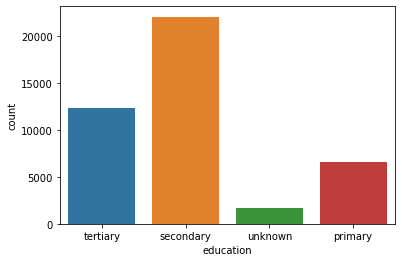

In [89]:
import seaborn as sns
sns.countplot(data=df, x='education');

We can see that people with secondary and tertiary education make successful term deposit

In [90]:
df['marital'].value_counts()

married     25868
single      11806
divorced     4965
Name: marital, dtype: int64

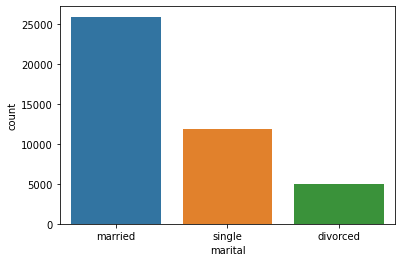

In [91]:
import seaborn as sns
sns.countplot(data=df, x='marital');

We can see that married people make successfull term deposit, while single and divorced people make signifactly worse

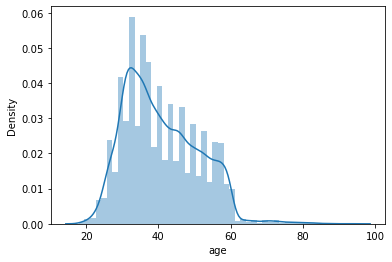

In [92]:
sns.distplot(df['age']);

On this diagram we can see that people in age from 30 to 40 make most suuccesful deposits, and then people from age 40 to 60 make much less


In [93]:
df['poutcome'].value_counts()

unknown    36085
failure     4271
other       1517
success      766
Name: poutcome, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [95]:
df.shape

(42639, 17)

In [96]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [97]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


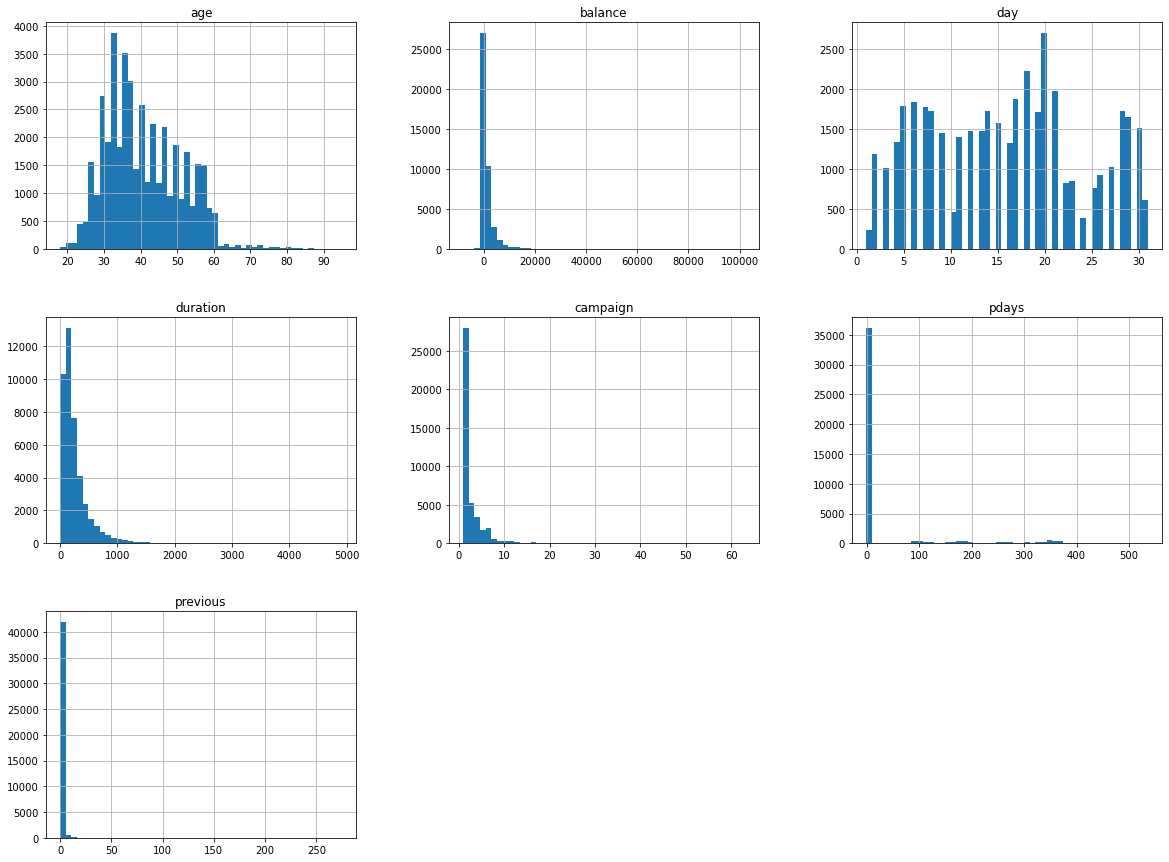

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize= (20,15))
plt.show()

## Age Distribution

<AxesSubplot:ylabel='Frequency'>

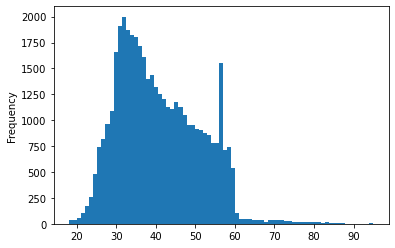

In [99]:
df["age"].plot.hist(bins=len(df["age"].unique()))

<AxesSubplot:xlabel='age', ylabel='Density'>

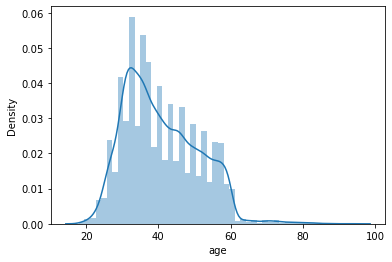

In [100]:
sns.distplot(df["age"])

### Job Distribution

<AxesSubplot:ylabel='job'>

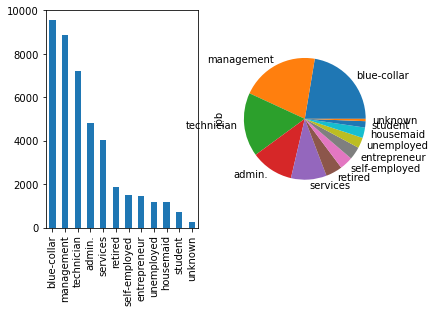

In [101]:
fig, (ax, ax2) = plt.subplots(ncols=2)
df["job"].value_counts().plot.bar(ax=ax)
df["job"].value_counts().plot.pie(ax=ax2)

### Default Distribution

<AxesSubplot:ylabel='default'>

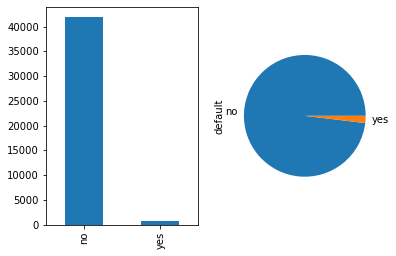

In [102]:
fig, (ax, ax2) = plt.subplots(ncols=2)
df["default"].value_counts().plot.bar(ax=ax)
df["default"].value_counts().plot.pie(ax=ax2)

### Housing Distribution

<AxesSubplot:ylabel='housing'>

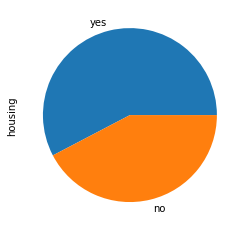

In [103]:
df["housing"].value_counts().plot.pie()

## LOAN DISTRIBUTION

<AxesSubplot:ylabel='loan'>

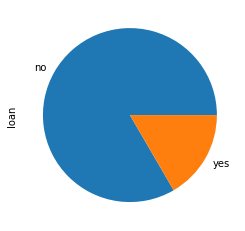

In [104]:
df["loan"].value_counts().plot.pie()

### Contact Distribution

<AxesSubplot:ylabel='contact'>

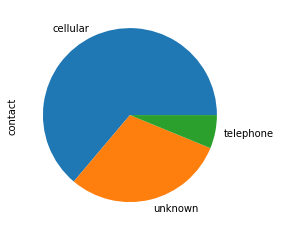

In [105]:
df["contact"].value_counts().plot.pie()

on this chart we can see that people make most deposits with cellular phone

### Day Distribution

<AxesSubplot:>

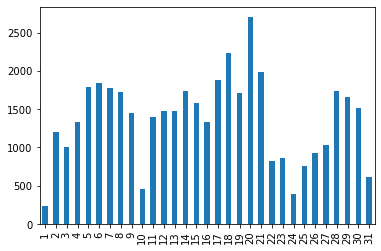

In [106]:
df["day"].value_counts().sort_index().plot.bar()

We can see on this diagram when people make they calls mostly

### Month distribution

In [107]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

<AxesSubplot:>

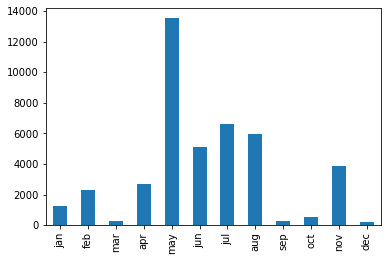

In [108]:
df["month"].value_counts().reindex(months).plot.bar()

We can see that in May people make most deposits.

# TERM DEPOSIT

<AxesSubplot:ylabel='term_deposit'>

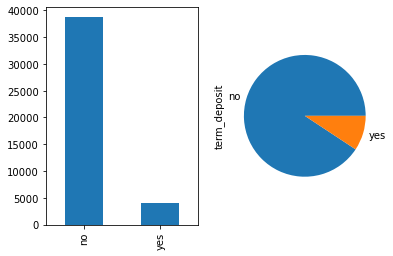

In [109]:
fig, (ax, ax2) = plt.subplots(ncols=2)
df["term_deposit"].value_counts().plot.bar(ax=ax)
df["term_deposit"].value_counts().plot.pie(ax=ax2)

## Convert Categorical features to numerical values

In [110]:
df.groupby(['marital'])['poutcome'].value_counts(normalize=True)

marital   poutcome
divorced  unknown     0.844713
          failure     0.100705
          other       0.037059
          success     0.017523
married   unknown     0.852868
          failure     0.099582
          other       0.031931
          success     0.015618
single    unknown     0.832543
          failure     0.101220
          other       0.042944
          success     0.023293
Name: poutcome, dtype: float64

## Transforming Null Values

In [111]:
df.replace("unknown", np.nan, inplace=True)

In [112]:
df.isna().sum()

age                 0
job               264
marital             0
education        1690
default             0
balance             0
housing             0
loan                0
contact         12776
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome        36085
term_deposit        0
dtype: int64

In [113]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


## Handling Missing Values

In [114]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [115]:
df = df.astype({"job":'category', 
                "marital":'category', 
                "education":'category', 
                "contact":'category',
                "month":'category'})

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           42639 non-null  int64   
 1   job           42375 non-null  category
 2   marital       42639 non-null  category
 3   education     40949 non-null  category
 4   default       42639 non-null  object  
 5   balance       42639 non-null  int64   
 6   housing       42639 non-null  object  
 7   loan          42639 non-null  object  
 8   contact       29863 non-null  category
 9   day           42639 non-null  int64   
 10  month         42639 non-null  category
 11  duration      42639 non-null  int64   
 12  campaign      42639 non-null  int64   
 13  pdays         42639 non-null  int64   
 14  previous      42639 non-null  int64   
 15  poutcome      6554 non-null   object  
 16  term_deposit  42639 non-null  object  
dtypes: category(5), int64(7), object(5)
memory usage: 

In [117]:
df.isnull().sum()

age                 0
job               264
marital             0
education        1690
default             0
balance             0
housing             0
loan                0
contact         12776
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome        36085
term_deposit        0
dtype: int64

## Filling Missing Values Randomly

In [118]:
def na_randomfill(series):
    na_mask = pd.isnull(series)   # boolean mask for null values
    n_null = na_mask.sum()        # number of nulls in the Series
    
    if n_null == 0:
        return series             # if there are no nulls, no need to resample
    
    # Randomly sample the non-null values from our series
    #  only sample this Series as many times as we have nulls 
    fill_values = series[~na_mask].sample(n=n_null, replace=True, random_state=0)

    # This ensures our new values will replace NaNs in the correct locations
    fill_values.index = series.index[na_mask]
    
    return series.fillna(fill_values)

In [119]:
df["job"] = na_randomfill(df["job"])
df["education"] = na_randomfill(df["education"])
df["contact"] = na_randomfill(df["contact"])
df["poutcome"] = na_randomfill(df["poutcome"])

In [120]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

## Label Encoding

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
df_en = df.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

In [123]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           42639 non-null  int64
 1   job           42639 non-null  int32
 2   marital       42639 non-null  int32
 3   education     42639 non-null  int32
 4   default       42639 non-null  int32
 5   balance       42639 non-null  int64
 6   housing       42639 non-null  int32
 7   loan          42639 non-null  int32
 8   contact       42639 non-null  int32
 9   day           42639 non-null  int64
 10  month         42639 non-null  int32
 11  duration      42639 non-null  int64
 12  campaign      42639 non-null  int64
 13  pdays         42639 non-null  int64
 14  previous      42639 non-null  int64
 15  poutcome      42639 non-null  int32
 16  term_deposit  42639 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.2 MB


## FEATURE IMPORTANCES

[0.1001235  0.0617269  0.02875755 0.02947158 0.00347661 0.09460416
 0.01476617 0.01080924 0.01276463 0.09592285 0.09504452 0.28179394
 0.06238267 0.03998475 0.02942093 0.03895   ]


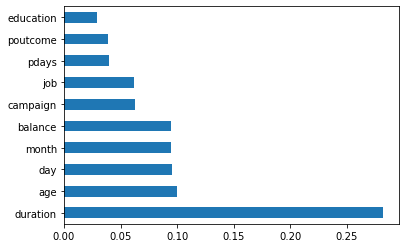

In [124]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X = df_en.drop("term_deposit", axis=1)
y = df_en["term_deposit"]
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# BALANCING DATASET

In [125]:
#Under-sampling the data set for high precision and high recall

dff = pd.concat([df_en[df_en["term_deposit"] == 0][0:2896], df_en[df_en["term_deposit"] == 1]])

# ONE-HOT ENCODING

One-Hot encoding effectively creates extra columns indicating the presence or absence of a category with value of 1 or 0, respectively.

In [126]:
dff.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,40,4,1,2,0,3032,1,0,0,4,8,261,0,0,0,0,0
1,26,9,2,1,0,945,1,0,0,4,8,151,0,0,0,0,0
2,15,2,1,1,0,918,1,1,0,4,8,76,0,0,0,1,0
3,29,1,1,0,0,2420,1,0,0,4,8,92,0,0,0,0,0
4,15,0,2,2,0,917,0,0,0,4,8,198,0,0,0,0,0


In [127]:
dff = pd.get_dummies(dff, columns=["job", "marital", "education", "month"])
dff.head()

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,40,0,3032,1,0,0,4,261,0,0,...,0,0,0,0,0,0,1,0,0,0
1,26,0,945,1,0,0,4,151,0,0,...,0,0,0,0,0,0,1,0,0,0
2,15,0,918,1,1,0,4,76,0,0,...,0,0,0,0,0,0,1,0,0,0
3,29,0,2420,1,0,0,4,92,0,0,...,0,0,0,0,0,0,1,0,0,0
4,15,0,917,0,0,0,4,198,0,0,...,0,0,0,0,0,0,1,0,0,0


# PREDICTION

In [128]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [129]:
X = dff.drop("term_deposit", axis=1)
y = dff["term_deposit"]

We will make a train set with 70 % of the dataset, and 30% for test set.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# EVALUATION

In [52]:
def draw_roc(model):
    roc_auc = roc_auc_score(y, model.predict(X))

    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Oranı')
    plt.ylabel('True Positive Oranı')
    plt.title('ROC')
    plt.show()

In [53]:
def print_scores(model, X_train, X_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    cross = cross_val_score(model, X_test, y_test, cv = 10).mean()
    
    draw_roc(loj_model)
    plot_confusion_matrix(model, X_test, y_test)
    
    disp = plot_precision_recall_curve(loj_model, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    print('Accuracy: {0:0.3f} \nPrecision: {1:0.3f}\nRecall: {2:0.3f} \nF1-Score: {3:0.3f}\n10-Fold Cross Validation: {4:0.3f}'
          .format(acc, precision, recall, f1, cross))

# Logistic Regression

In [54]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
y_pred = loj_model.predict(X_test)

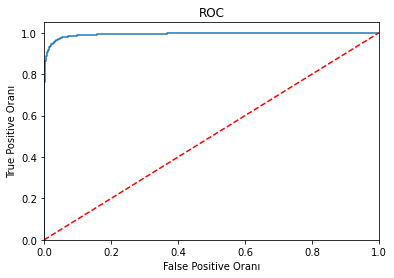

Accuracy: 0.958 
Precision: 0.969
Recall: 0.956 
F1-Score: 0.958
10-Fold Cross Validation: 0.958


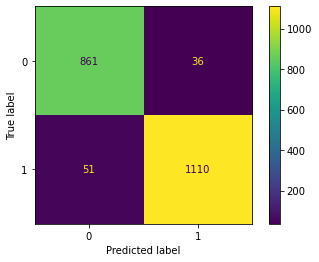

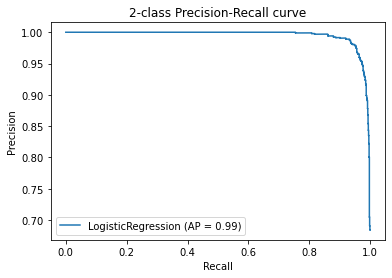

In [55]:
print_scores(loj_model, X_train, X_test, y_test, y_pred)

## Gaussian Naive Bayes

In [56]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

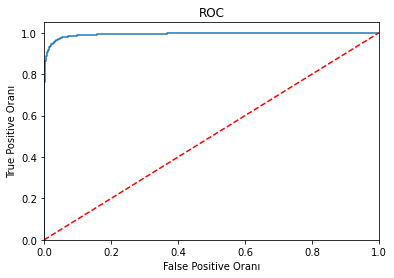

Accuracy: 0.920 
Precision: 1.000
Recall: 0.858 
F1-Score: 0.920
10-Fold Cross Validation: 0.918


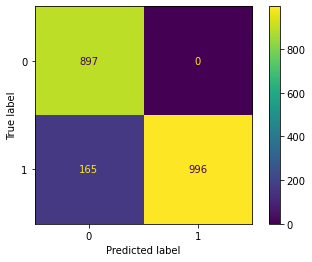

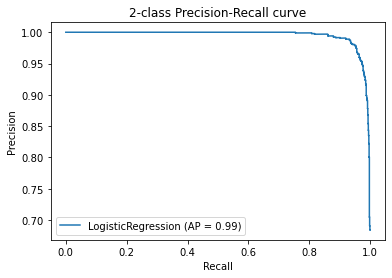

In [57]:
print_scores(nb_model, X_train, X_test, y_test, y_pred)

# K-Nearest Neighbours

In [58]:
%%time
knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(1,15)}

knn_cv = GridSearchCV(knn, knn_params, 
                            cv = 10, 
                            n_jobs = 5, 
                            verbose = 2 )

knn_cv.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    5.4s


Wall time: 10.6 s


[Parallel(n_jobs=5)]: Done 140 out of 140 | elapsed:   10.4s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=2)

In [59]:
print("KNN score:" + str(knn_cv.best_score_))
print("KNN parameter: " + str(knn_cv.best_params_))

KNN score:0.807464335421016
KNN parameter: {'n_neighbors': 9}


In [60]:
knn = KNeighborsClassifier(9)
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

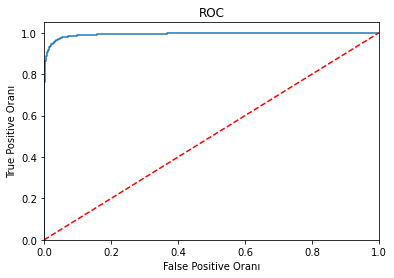

Accuracy: 0.810 
Precision: 0.844
Recall: 0.815 
F1-Score: 0.810
10-Fold Cross Validation: 0.792


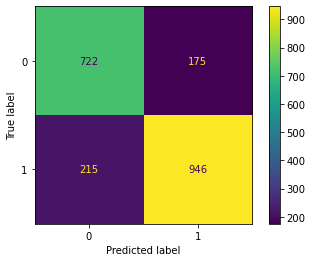

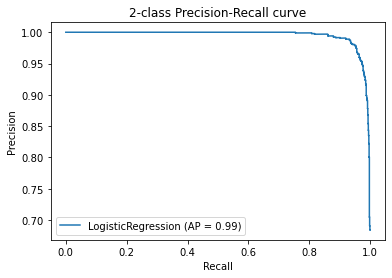

In [61]:
print_scores(knn_model, X_train, X_test, y_test, y_pred)

## Support Vector Classification

In [62]:
#%%time
#svc_model = SVC(kernel = "linear")
#svc_model.fit(X_train, y_train)
#y_pred = svc_model.predict(X_test)

In [63]:
#print_scores(svc_model, X_train, X_test, y_test, y_pred)

## RBF Vector Classification

In [64]:
%%time
rbf_model = SVC(kernel = "rbf")
rbf_model.fit(X_train, y_train)
y_pred = rbf_model.predict(X_test)

Wall time: 2.56 s


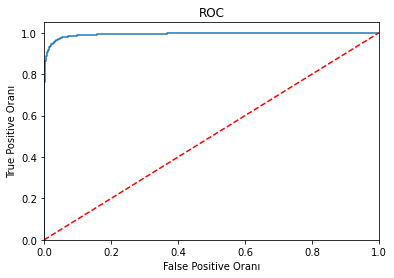

Accuracy: 0.805 
Precision: 0.821
Recall: 0.837 
F1-Score: 0.805
10-Fold Cross Validation: 0.792


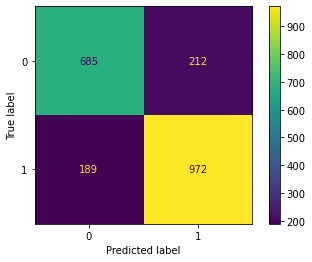

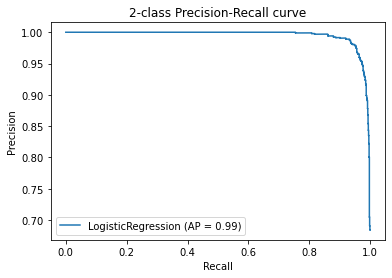

In [65]:
print_scores(rbf_model, X_train, X_test, y_test, y_pred)

# Neural Networks

In [66]:
scaler = StandardScaler()

In [67]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
%%time
mlpc_model = MLPClassifier()
mlpc_model.fit(X_train_scaled, y_train)
y_pred = mlpc_model.predict(X_test_scaled)

Wall time: 11.2 s


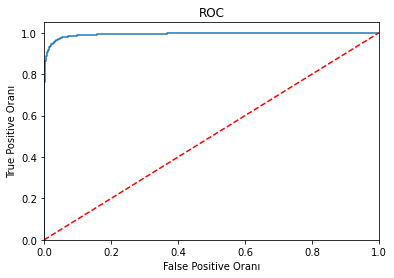

Accuracy: 0.959 
Precision: 0.962
Recall: 0.966 
F1-Score: 0.959
10-Fold Cross Validation: 0.928


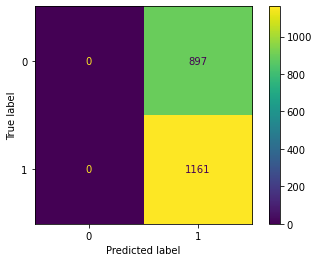

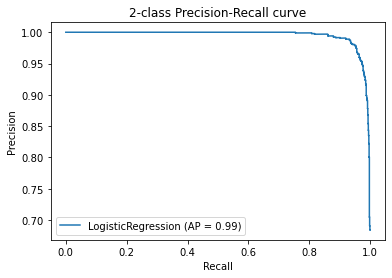

In [69]:
print_scores(mlpc_model, X_train, X_test, y_test, y_pred)

## Decision Tree

In [70]:
%%time
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = 5, verbose = 2)
cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 1026 tasks      | elapsed:    6.7s
[Parallel(n_jobs=5)]: Done 2650 tasks      | elapsed:   20.6s


Wall time: 37.6 s


[Parallel(n_jobs=5)]: Done 4320 out of 4320 | elapsed:   37.5s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]},
             verbose=2)

In [71]:
print(" parameter: " + str(cart_cv.best_params_))

 parameter: {'max_depth': 7, 'min_samples_split': 35}


In [72]:

cart_model = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

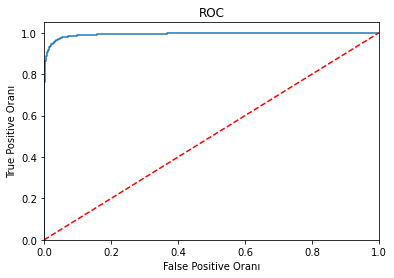

Accuracy: 0.952 
Precision: 0.940
Recall: 0.978 
F1-Score: 0.952
10-Fold Cross Validation: 0.964


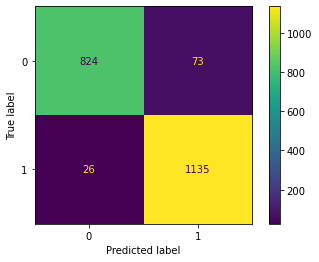

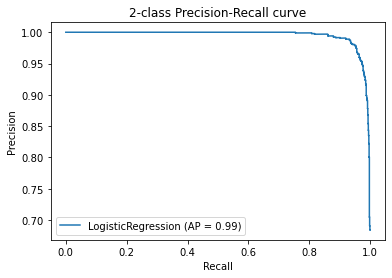

In [73]:
print_scores(cart_model, X_train, X_test, y_test, y_pred)

# Random Forest

In [74]:
%%time
rf_params = {"max_depth": [2,5,8],
            "max_features": [2,5,8],
            "n_estimators": [10,50,100],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv = GridSearchCV(rf_model, 
                       rf_params, 
                       cv = 10, 
                       n_jobs = 5, 
                       verbose = 2) 
rf_cv.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  52 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done 237 tasks      | elapsed:   19.5s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   36.4s
[Parallel(n_jobs=5)]: Done 723 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 810 out of 810 | elapsed:  1.3min finished


Wall time: 1min 19s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [2, 5, 8], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [75]:
print("parameter: " + str(rf_cv.best_params_))

parameter: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 100}


In [76]:
rf_model = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 5,
                                  n_estimators = 100)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

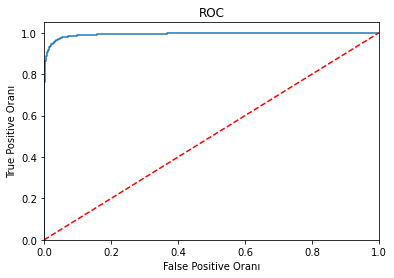

Accuracy: 0.964 
Precision: 0.980
Recall: 0.955 
F1-Score: 0.964
10-Fold Cross Validation: 0.965


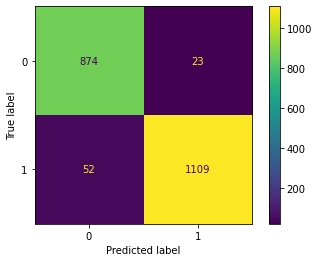

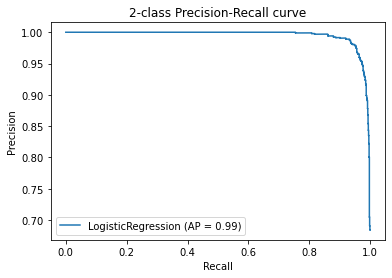

In [77]:
print_scores(rf_model, X_train, X_test, y_test, y_pred)

# Gradient Boosting Machines

In [78]:
%%time
gbm_model = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                 min_samples_split = 5,
                                 n_estimators = 100)
gbm_model.fit(X_train,y_train)
y_pred = gbm_model.predict(X_test)

Wall time: 1.71 s


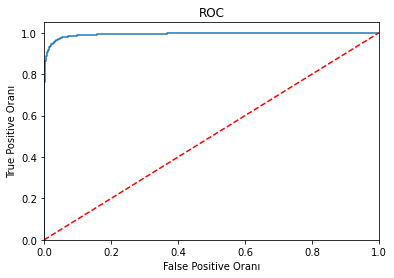

Accuracy: 0.950 
Precision: 0.940
Recall: 0.973 
F1-Score: 0.950
10-Fold Cross Validation: 0.960


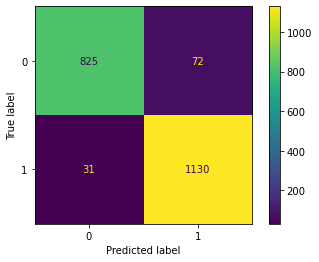

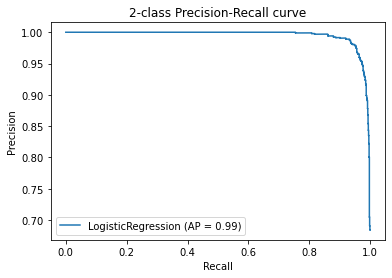

In [79]:
print_scores(gbm_model, X_train, X_test, y_test, y_pred)

# Benchmarking All Models

In [81]:
models = [
    knn_model,
    loj_model,
    rbf_model,
    nb_model,
    mlpc_model,
    cart_model,
    rf_model,
    gbm_model
]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(acc))

----------------------------
KNeighborsClassifier:
Accuracy: 81.0496%
----------------------------
LogisticRegression:
Accuracy: 95.7726%
----------------------------
SVC:
Accuracy: 80.5151%
----------------------------
GaussianNB:
Accuracy: 91.9825%
----------------------------
MLPClassifier:
Accuracy: 56.4140%
----------------------------
DecisionTreeClassifier:
Accuracy: 95.1895%
----------------------------
RandomForestClassifier:
Accuracy: 96.3557%
----------------------------
GradientBoostingClassifier:
Accuracy: 94.9951%


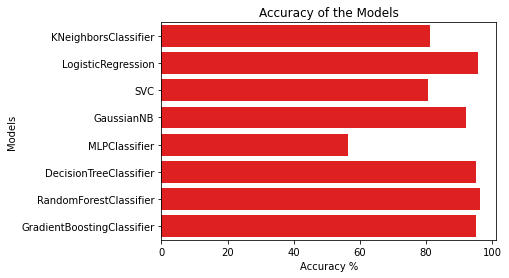

In [82]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the Models');

In [83]:
results.sort_values(by="Accuracy", ascending=False, ignore_index=True)

,Models,Accuracy
0,RandomForestClassifier,96.355685
1,LogisticRegression,95.772595
2,DecisionTreeClassifier,95.189504
3,GradientBoostingClassifier,94.995141
4,GaussianNB,91.982507
5,KNeighborsClassifier,81.049563
6,SVC,80.515063
7,MLPClassifier,56.413994


We can conclude that we have high accuracy on most algorithms, but that is not necessarily a good thing, because it mightbe 
the result of over-fitting. Over-fitting is that the model is overly trained to the dataset which my capture noise.
That is why we use confusion matrix, where we can compute Precision and Recall, which are very good on this model.
From the Precision and Recall we can get the F1-Score which is the best metric for our model.

## REPORT
### The main goal is to predict if the customer will subscribe (yes/no) to a term deposit (variable y), where I used some popular algorithms to predict the problem , and metrics: Precision, Recall, F1-Score and Cross-Validation.  First I done some data preprocesing and visualization, then distribution of most important features. Then I done feature engineering, One-Hot encoding and finally prediction, where we archieve best accuracy: 96.355 , and that mean that we are very certain in main goal, that the customer will sucscribe to a term deposit.